In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Tasks
1. Data Loading & Initial Inspection
- Load the CSV file using Pandas.
- Display shape, dtypes, memory usage, and descriptive statistics.
- Calculate column-wise cardinality and unique counts.

In [28]:
df = pd.read_csv('StudentsPerformance.csv')
df.shape
df.dtypes
df.memory_usage()
df.describe()
cardinality = df.nunique()
cardinality

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


2. Missing Value Analysis
- Compute missing value percentages per column.
- Visualize missing values using a bar chart.
- Replace, drop, or impute missing values (justify your choice).

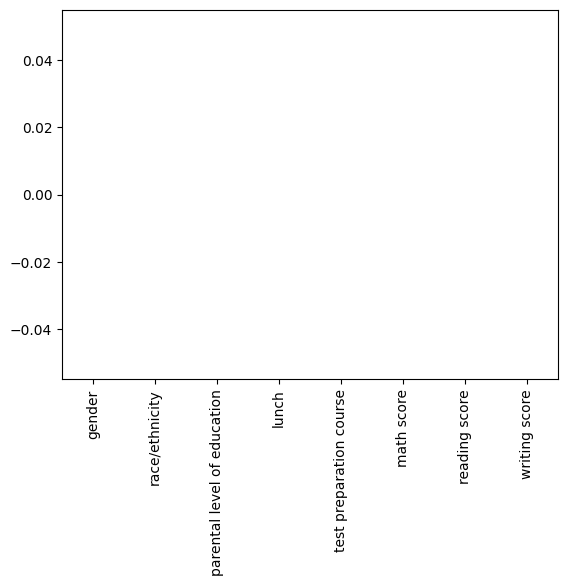

In [77]:
df_raw = pd.read_csv("StudentsPerformance.csv")
missing_percentage = df_raw.isnull().mean() * 100
missing_percentage
df_raw.drop('lunch',axis=1,inplace=True)
missing_percentage.plot(kind='bar')


3. Column Selection & Filtering
- Use both df.loc and df.iloc for filtering.
- Apply multiple conditions (AND/OR).
- Filter using string contains(), startswith(), endswith().
- Create at least 5 different filtered datasets.

In [38]:
female_math = df.loc[df['gender'] == 'female', 'math score']
female_math
df.iloc[0:5,0:2]
prep_completed = df[df["test preparation course"].str.contains("completed")]
prep_completed
parent_bachelor = df[df["parental level of education"].str.startswith("bachelor")]
parent_bachelor
group_c = df[df["race/ethnicity"].str.endswith("C")]
group_c
read_or_male= df.loc[(df['gender'] == 'male') | (df['reading score'] > 90)]
read_or_male

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
2,female,group B,master's degree,none,90,95,93
3,male,group A,associate's degree,none,47,57,44
4,male,group C,some college,none,76,78,75
6,female,group B,some college,completed,88,95,92
7,male,group B,some college,none,40,43,39
...,...,...,...,...,...,...,...
987,male,group E,some high school,completed,81,75,76
990,male,group E,high school,completed,86,81,75
994,male,group A,high school,none,63,63,62
995,female,group E,master's degree,completed,88,99,95


4. Feature Engineering
- Create 5+ new features using:
* Arithmetic operations (NumPy)
* Binning (pd.cut, pd.qcut)

In [46]:
df["average_score"] =np.mean(df[["math score", "reading score", "writing score"]],axis=1)

df["total_score"] = np.sum(df[["math score", "reading score", "writing score"]],axis=1)

df["score_range"] = (df[["math score", "reading score", "writing score"]].max(axis=1) -
df[["math score", "reading score", "writing score"]].min(axis=1)
)

df["reading_q"] = pd.qcut(df["reading score"],q=4,labels=["Q1", "Q2", "Q3", "Q4"])

df["overall_level"] = pd.cut(df["average_score"],bins=[0, 50, 70, 90],labels=["Low", "Medium", "High"])

df[["average_score","total_score","score_range","reading_q","overall_level"]].head()

,average_score,total_score,score_range,reading_q,overall_level
0,72.666667,218,2,Q3,High
1,82.333333,247,21,Q4,High
2,92.666667,278,5,Q4,NaN
3,49.333333,148,13,Q1,Low
4,76.333333,229,3,Q3,High


5. Grouping & Pivot Tables
- Use groupby() with multiple aggregations:
mean, sum, min, max, std, median, nunique
- Create a pivot table summarizing performance across categories.
- Visualize at least 3 aggregate results using Matplotlib.

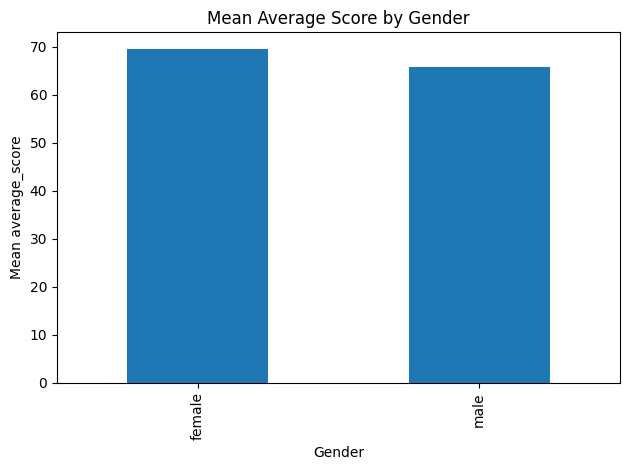

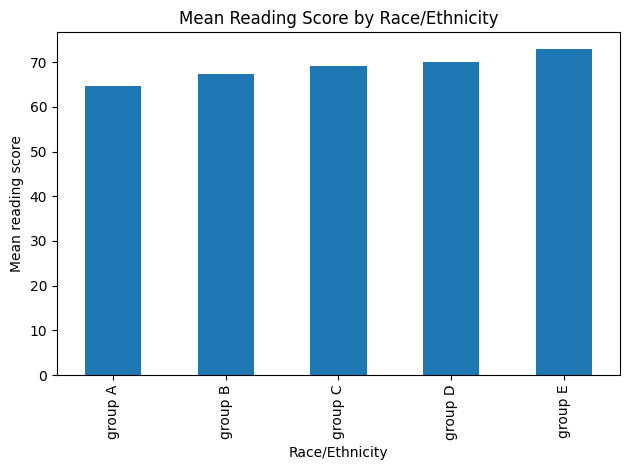

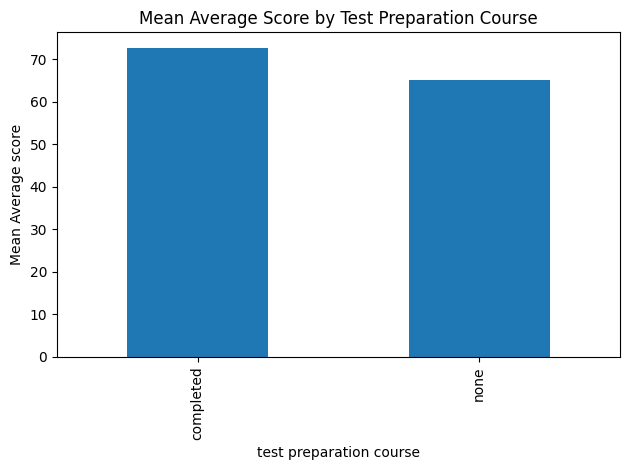

In [69]:
group_gender = df.groupby("gender").agg({
    "math score": ["mean", "sum", "min", "max", "std", "median", "nunique"],
    "reading score": ["mean", "sum", "min", "max", "std", "median", "nunique"],
    "writing score": ["mean", "sum", "min", "max", "std", "median", "nunique"],})
group_gender

pivot_table = pd.pivot_table(df,
    values=["math score", "reading score", "writing score"],index="gender",
    columns="test preparation course",aggfunc="mean")
pivot_table

avg_by_gender = df.groupby("gender")["average_score"].mean()

plt.figure()
avg_by_gender.plot(kind="bar")
plt.title("Mean Average Score by Gender")
plt.ylabel("Mean average_score")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()

reading_by_group = df.groupby("race/ethnicity")["reading score"].mean()

plt.figure()
reading_by_group.plot(kind="bar")
plt.title("Mean Reading Score by Race/Ethnicity")
plt.ylabel("Mean reading score")
plt.xlabel("Race/Ethnicity")
plt.tight_layout()
plt.show()

average_by_prep = df.groupby("test preparation course")["average_score"].mean()

plt.figure()
average_by_prep.plot(kind="bar")
plt.title("Mean Average Score by Test Preparation Course")
plt.ylabel("Mean Average score")
plt.tight_layout()
plt.show()

6. Sorting & Ranking
- Sort values using multiple columns.
- Create ranking columns (dense, average, first).
- Highlight top 10 and bottom 10 students.

In [59]:
df_sorted = df.sort_values(by=["average_score", "math score"], ascending=[False, False])
df_sorted.head()

df["rank_dense"] = df["average_score"].rank(method="dense", ascending=False)
df["rank_average"] = df["average_score"].rank(method="average", ascending=False)
df["rank_first"] = df["average_score"].rank(method="first", ascending=False)

df[["average_score", "rank_dense", "rank_average", "rank_first"]].head()

top_10 = df_sorted.head(10)
bottom_10 = df_sorted.tail(10)

top_10
bottom_10

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,average_score,total_score,score_range,math_level,overall_level,reading_q,rank_dense,rank_average,rank_first
211,male,group C,some college,none,35,28,27,30.000000,90,8,Low,Low,Q1,187.0,991.0,991.0
338,female,group B,some high school,none,24,38,27,29.666667,89,14,Low,Low,Q1,188.0,992.5,992.0
787,female,group B,some college,none,19,38,32,29.666667,89,19,Low,Low,Q1,188.0,992.5,993.0
601,female,group C,high school,none,29,29,30,29.333333,88,1,Low,Low,Q1,189.0,994.0,994.0
76,male,group E,some high school,none,30,26,22,26.000000,78,8,Low,Low,Q1,190.0,995.5,996.0
17,female,group B,some high school,none,18,32,28,26.000000,78,14,Low,Low,Q1,190.0,995.5,995.0
327,male,group A,some college,none,28,23,19,23.333333,70,9,Low,Low,Q1,191.0,997.0,997.0
596,male,group B,high school,none,30,24,15,23.000000,69,15,Low,Low,Q1,192.0,998.0,998.0
980,female,group B,high school,none,8,24,23,18.333333,55,16,Low,Low,Q1,193.0,999.0,999.0
59,female,group C,some high school,none,0,17,10,9.000000,27,17,NaN,Low,Q1,194.0,1000.0,1000.0


7. String Operations
- Clean categorical text fields.
- Use regex extraction (str.extract).
- Count occurrences of each category.

In [68]:
df["gender_cleaned"] = df["gender"].str.lower().str.strip()
df["race_cleaned"] = df["race/ethnicity"].str.lower().str.strip()
df["prep_cleaned"] = df["test preparation course"].str.lower().str.strip()

df["short_education_level"] = df["parental level of education"].str.extract(
    r"(high school|associate's degree|bachelor's degree|master's degree)"
)
df["gender_cleaned"].value_counts()

df["race_cleaned"].value_counts()

df["prep_cleaned"].value_counts()

df["short_education_level"].value_counts()

,count
short_education_level,
high school,375
associate's degree,222
bachelor's degree,118
master's degree,59


8. Data Export
- Export final cleaned dataset to CSV.
- Save all figures as PNG files.
- Save summary tables (groupby results) to Excel sheets.

In [79]:
df.to_csv("students_cleaned.csv", index=False)

with pd.ExcelWriter("summary_tables.xlsx") as writer:
    group_gender.to_excel(writer, sheet_name="Groupby_Gender")
    pivot_table.to_excel(writer, sheet_name="Pivot_Performance")


A. Combine at least 2 datasets
- Students must download an additional CSV from Kaggle and merge it using:
* inner join
* left join
- Compare the effect of different joins.

In [83]:
students = df.copy()
test_scores = pd.read_csv("test_scores.csv")

merged_inner = pd.merge(
    students,
    test_scores,
    left_on="math score",
    right_on="math",
    how="inner"
)

merged_left = pd.merge(
    students,
    test_scores,
    left_on="math score",
    right_on="math",
    how="left"
)

len(students), len(test_scores), len(merged_inner), len(merged_left)

merged_left.isnull().sum()


,0
gender,0
race/ethnicity,0
parental level of education,0
test preparation course,0
math score,0
reading score,0
writing score,0
average_score,0
total_score,0
score_range,0


B. Outlier Detection
- Use IQR method to identify outliers.
- Visualize outliers with a boxplot.
- Replace or remove them with justification.

/tmp/ipython-input-4107098988.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[c] for c in score_cols], labels=score_cols)


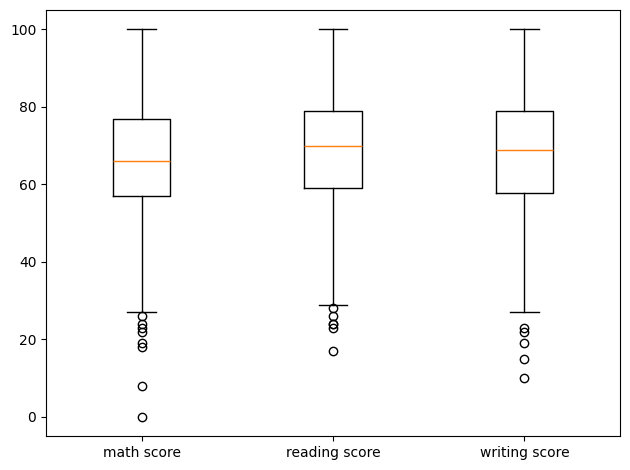

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.165000,69.201000,68.094375
std,14.922414,14.503481,15.068368
min,27.000000,29.000000,25.875000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [85]:
score_cols = ["math score", "reading score", "writing score"]

def iqr_bounds(s):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    return q1 - 1.5 * iqr, q3 + 1.5 * iqr

outliers = {}
for c in score_cols:
    lo, hi = iqr_bounds(df[c])
    outliers[c] = ((df[c] < lo) | (df[c] > hi)).sum()
outliers

plt.figure()
plt.boxplot([df[c] for c in score_cols], labels=score_cols)
plt.tight_layout()
plt.show()

df_capped = df.copy()
for c in score_cols:
    lo, hi = iqr_bounds(df_capped[c])
    df_capped[c] = df_capped[c].clip(lo, hi)

df_capped[score_cols].describe()

C. Correlation Analysis
- Compute correlation matrix.
- Plot a heatmap using Matplotlib (no seaborn).
- Interpret 3 strongest correlations.

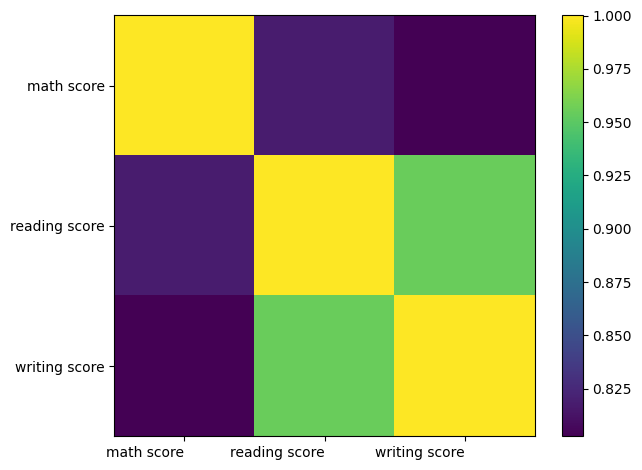

,,0
writing score,reading score,0.954598
math score,reading score,0.817580
writing score,math score,0.802642


In [86]:
num_cols = ["math score", "reading score", "writing score"]

corr = df[num_cols].corr()
corr

plt.figure()
plt.imshow(corr.values)
plt.xticks(range(len(num_cols)), num_cols,ha="right")
plt.yticks(range(len(num_cols)), num_cols)
plt.colorbar()
plt.tight_layout()
plt.show()

corr_abs = corr.abs().copy()
np.fill_diagonal(corr_abs.values, 0)

corr_abs.unstack().sort_values(ascending=False).drop_duplicates().head(3)

D. Distribution Analysis
- Plot histograms using matplotlib.
- Compare distributions of math, reading, and writing scores.

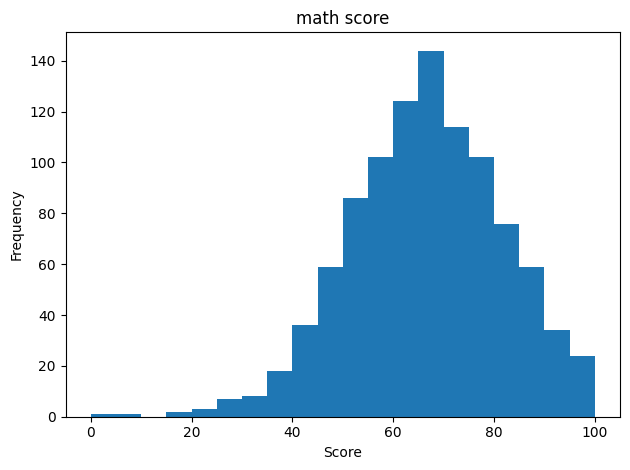

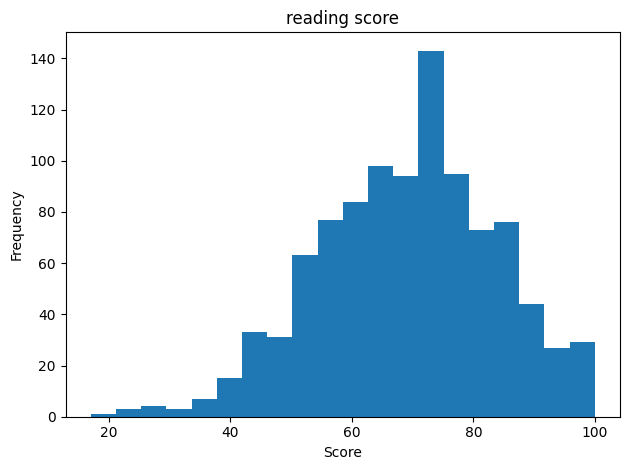

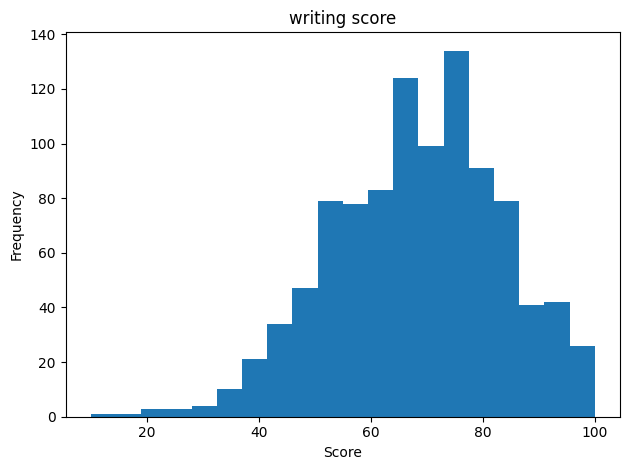

In [87]:
score_cols = ["math score", "reading score", "writing score"]

for col in score_cols:
    plt.figure()
    plt.hist(df[col], bins=20)
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.title(col)
    plt.tight_layout()
    plt.show()